## Start

In [1]:
import optuna
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as MAE

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv").drop(columns=['id'])
test = pd.read_csv("test.csv").drop(columns=['id'])

train.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,104.0,12.5,0.25,0.25,0.25,0.75,69.7,42.1,58.2,50.2,24.3,41.2,16.00,0.26,0.477941,0.423927,34.043022,6079.08526
1,764.0,25.0,0.00,0.00,0.00,0.00,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.334594,0.354415,27.735098,2946.92602
2,621.0,25.0,0.50,0.25,0.75,0.63,86.0,52.0,71.9,62.0,30.0,50.8,34.00,0.56,0.468192,0.417915,34.838815,5323.30034
3,499.0,25.0,0.50,0.25,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.00,0.39,0.500558,0.427431,35.134955,6157.05484
4,439.0,12.5,0.25,0.38,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,24.00,0.39,0.520181,0.464067,37.029180,6992.82314


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  15000 non-null  float64
 1   clonesize             15000 non-null  float64
 2   honeybee              15000 non-null  float64
 3   bumbles               15000 non-null  float64
 4   andrena               15000 non-null  float64
 5   osmia                 15000 non-null  float64
 6   MaxOfUpperTRange      15000 non-null  float64
 7   MinOfUpperTRange      15000 non-null  float64
 8   AverageOfUpperTRange  15000 non-null  float64
 9   MaxOfLowerTRange      15000 non-null  float64
 10  MinOfLowerTRange      15000 non-null  float64
 11  AverageOfLowerTRange  15000 non-null  float64
 12  RainingDays           15000 non-null  float64
 13  AverageRainingDays    15000 non-null  float64
 14  fruitset              15000 non-null  float64
 15  fruitmass          

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Row#,15000.0,427.577533,214.127422,0.000000,247.000000,469.000000,598.000000,777.000000
clonesize,15000.0,19.773500,6.644451,10.000000,12.500000,25.000000,25.000000,40.000000
honeybee,15000.0,0.388500,0.390162,0.000000,0.250000,0.500000,0.500000,18.430000
bumbles,15000.0,0.284573,0.058855,0.000000,0.250000,0.250000,0.380000,0.585000
andrena,15000.0,0.486751,0.147560,0.000000,0.380000,0.500000,0.630000,0.750000
osmia,15000.0,0.591612,0.144194,0.000000,0.500000,0.630000,0.750000,0.750000
MaxOfUpperTRange,15000.0,82.245667,9.104125,69.700000,77.400000,86.000000,86.000000,94.600000
MinOfUpperTRange,15000.0,49.719033,5.519865,39.000000,46.800000,52.000000,52.000000,57.200000
AverageOfUpperTRange,15000.0,68.717353,7.606632,56.800000,64.700000,71.900000,71.900000,79.000000
MaxOfLowerTRange,15000.0,59.282947,6.579928,50.200000,55.800000,62.000000,62.000000,68.200000


## Feature Engineering

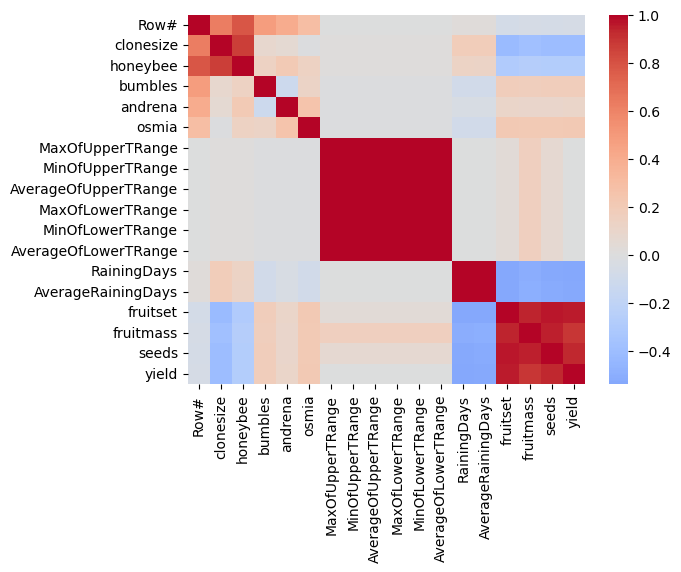

In [5]:
sns.heatmap(train.corr(method='spearman'), cmap='coolwarm', center=0)
plt.show()

Хоть `Row#` имеет некую высокую корреляцию с некоторыми признаками, но по сути это лишь шум, так что мы уберём его. Все `TRange` имеют очень высокую корреляцию между собой и очень низкую между другими, поэтому их тоже можем выбросить. Есть ещё некоторые признаки имеющие очень похожие корреляции, оставим среди них только те, у которых самая высокая корреляция. Добавим новые признаки.

In [6]:
def update_df(df:pd.DataFrame):
    df = df.copy()

    # Общий показатель всех опылителей, чтобы оценить их совокупное воздействие на урожайность.
    # df['total_pollinators'] = df['honeybee'] + df['bumbles'] + df['andrena'] + df['osmia']
    
    # Доля медоносных пчел среди всех опылителей, чтобы увидеть их значимость в опылении.
    # df['honeybee_ratio'] = df['honeybee'] / (df['total_pollinators'] + 1e-6)

    # Суммарное количество диких пчел для анализа их вклада в опыление.
    # df['wild_bees'] = df['bumbles'] + df['andrena'] + df['osmia']

    # Количество дождливых дней на одного опылителя, что может помочь понять, насколько опыление зависит от дождя.
    # df['rain_per_pollinator'] = df['RainingDays'] / (df['total_pollinators'] + 1e-6)

    # Количество семян на единицу завязей, что может помочь понять, насколько плодовитое растение.
    df['seed_per_fruit'] = df['seeds'] / (df['fruitset'] + 1e-6)

    # Оценка потенциальной продуктивности на основе массы плодов и количества семян.
    df['yield_factor'] = df['fruitmass'] * df['seeds']

    # Показатель, чтобы понять, как размер клонов влияет на эффективность опыления.
    # df['clone_to_pollinator_ratio'] = df['clonesize'] / (df['total_pollinators'] + 1e-6)

    # Среднее количество плодов на один клон, что может указать на эффективность размножения в зависимости от размера клона.
    df['fruit_per_clone'] = df['fruitset'] / (df['clonesize'] + 1e-6)


    if 'yield' in df.columns:
        df = df[['fruitset', 'yield_factor', 'fruit_per_clone', 'seed_per_fruit', 'yield']]
    else:
        df = df[['fruitset', 'yield_factor', 'fruit_per_clone', 'seed_per_fruit']]

    return df


train = update_df(train)
test = update_df(test)

train.head()

,fruitset,yield_factor,fruit_per_clone,seed_per_fruit,yield
0,0.477941,14.431757,0.038235,71.228382,6079.08526
1,0.334594,9.829734,0.013384,82.891651,2946.92602
2,0.468192,14.559679,0.018728,74.411152,5323.30034
3,0.500558,15.017763,0.020022,70.191436,6157.05484
4,0.520181,17.184015,0.041614,71.185062,6992.82314


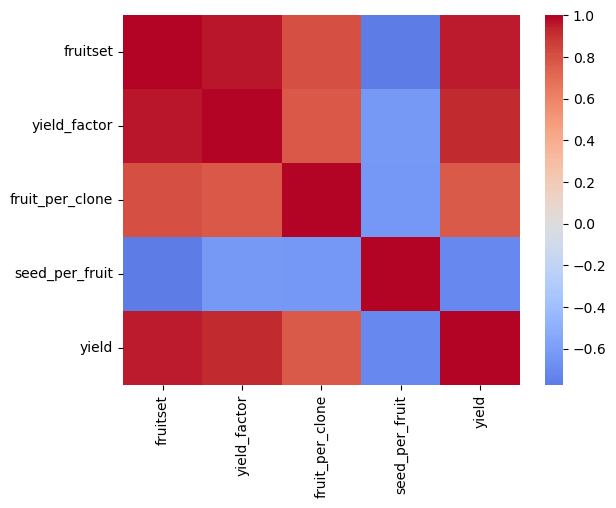

In [7]:
sns.heatmap(train.corr(method='spearman'), cmap='coolwarm', center=0)
plt.show()

## Model

В начале я использовал разные стэк модели, но все они показали результаты хуже чем обычный `RandomForestRegressor`

In [8]:
SEED = 1

X = train.drop('yield', axis=1)
y = train['yield']

kf = KFold(n_splits=10, shuffle=True, random_state=SEED)

In [9]:
def objective(trial):
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 50, 600)
    rf_max_depth = trial.suggest_int('rf_max_depth', 3, 20)
    rf_min_samples_split = trial.suggest_int('rf_min_samples_split', 2, 20)
    rf_min_samples_leaf = trial.suggest_int('rf_min_samples_leaf', 1, 20)
    rf_min_impurity_decrease = trial.suggest_float('rf_min_impurity_decrease', 0.0, 0.1)
    rf_ccp_alpha = trial.suggest_float('rf_ccp_alpha', 0.0, 0.1)

    current_params = {
        'rf_n_estimators': rf_n_estimators,
        'rf_max_depth': rf_max_depth,
        'rf_min_samples_split': rf_min_samples_split,
        'rf_min_samples_leaf': rf_min_samples_leaf,
        'rf_min_impurity_decrease': rf_min_impurity_decrease,
        'rf_ccp_alpha': rf_ccp_alpha
    }

    for completed_trial in study.get_trials(states=[optuna.trial.TrialState.COMPLETE]):
        if all(completed_trial.params.get(param) == value for param, value in current_params.items()):
            raise optuna.TrialPruned()

    rf_model = RandomForestRegressor(
        n_estimators=rf_n_estimators,
        criterion='absolute_error',
        max_depth=rf_max_depth,
        min_samples_split=rf_min_samples_split,
        min_samples_leaf=rf_min_samples_leaf,
        min_impurity_decrease=rf_min_impurity_decrease,
        ccp_alpha=rf_ccp_alpha,
        n_jobs=-1,
        random_state=SEED
    )

    train_scores = []
    val_scores = []

    for train_index, val_index in kf.split(X, y):
        X_t, X_v = X.iloc[train_index], X.iloc[val_index]
        y_t, y_v = y.iloc[train_index], y.iloc[val_index]

        rf_model.fit(X_t, y_t)

        train_score = MAE(y_t, rf_model.predict(X_t))
        val_score = MAE(y_v, rf_model.predict(X_v))

        train_scores.append(train_score)
        val_scores.append(val_score)

    mean_train_score = np.mean(train_scores)
    mean_val_score = np.mean(val_scores)
    score_diff = mean_val_score - mean_train_score

    print(f"Mean Train Score: {mean_train_score}")
    print(f"Mean Val Score: {mean_val_score}")
    print(f"Score Difference: {score_diff}")

    trial.set_user_attr("mean_train_score", mean_train_score)
    trial.set_user_attr("mean_val_score", mean_val_score)
    trial.set_user_attr("score_diff", score_diff)

    if score_diff < 0:
        return 1000

    score = mean_val_score + score_diff

    return score


study = optuna.create_study(
    storage='sqlite:///optuna.db',
    study_name='tuning',
    load_if_exists=True,
    direction='minimize'
)

study.optimize(objective, n_trials=0)

[I 2024-11-09 18:07:16,570] Using an existing study with name 'tuning' instead of creating a new one.


In [10]:
trial = study.best_trial

print("Best trial:")
print(f"Value: {trial.value}")
print("Params:")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

Best trial:
Value: 264.31359651062763
Params:
    rf_n_estimators: 87
    rf_max_depth: 8
    rf_min_samples_split: 4
    rf_min_samples_leaf: 1
    rf_max_features: 6
    huber_alpha: 0.0031615292129171814
    huber_epsilon: 1.755503156264336
    ridge_alpha: 1.762891917316628


Глянем какие параметры влияли а какие нет

In [11]:
optuna.visualization.plot_param_importances(study).show()